Module 1 Assignment 1: House Prices: Advanced Regression Techniques EDA 

I.Set up

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
df_train = pd.read_csv("train-2.csv")

II.Data Wrangling

In [21]:
df_train.info() #Need to Drop the columns with more null value row
df_train.shape
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
df2_train = df_train.drop(columns=['LotFrontage',
                                   'Alley',
                                   'FireplaceQu',
                                  'PoolQC',
                                  'Fence',
                                  'MiscFeature'])
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

1. Explore Numerical variable

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,0.002951,0.281721,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.037610,-0.068901,0.100063,...,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.050634,0.062341,0.026589,0.031687,-0.135907
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.238518,0.074853,...,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.007683,-0.013585,-0.021407,-0.084284
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.171098,-0.079686,...,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,0.068777,-0.003511,0.043950,-0.077856
YrSold,0.000712,-0.021407,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,-0.014969,-0.036526,...,-0.010269,-0.036014,0.031687,-0.034516,-0.024096,-0.039117,0.004906,-0.145721,1.000000,-0.028923
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.015415,0.008273,...,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,-0.006242,0.021172,0.000712,-0.021917
MiscVal,-0.006242,-0.007683,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,-0.018479,-0.002416,...,0.001290,0.007767,0.062341,0.024763,0.001409,-0.043080,1.000000,-0.006495,0.004906,-0.021190
BsmtHalfBath,-0.020155,-0.002333,0.048046,-0.040150,0.117821,-0.038162,-0.012337,0.026673,-0.000315,-0.018918,...,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.020891,-0.007367,0.032873,-0.046524,-0.016844
MoSold,0.021172,-0.013585,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,0.013196,0.050240,...,-0.009050,0.046544,0.026589,0.036907,0.046357,0.040522,-0.006495,1.000000,-0.145721,0.046432
BedroomAbvGr,0.037719,-0.023438,0.119690,0.101676,0.012980,-0.070651,-0.040581,0.102821,0.050450,0.521270,...,0.226651,1.000000,0.198597,0.676620,0.107570,0.086106,0.007767,0.046544,-0.036014,0.168213
BsmtFullBath,0.002289,0.003491,0.158155,0.111098,-0.054942,0.187599,0.119470,0.085310,0.307351,0.034836,...,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.131881,-0.023047,-0.025361,0.067049,0.227122


<AxesSubplot:>

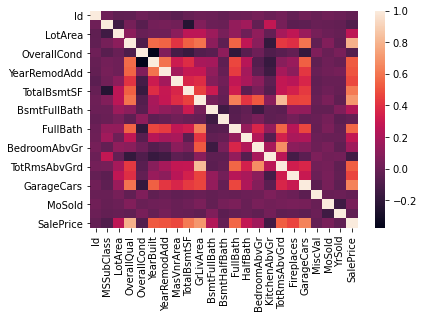

In [95]:
df_nv_train = df2_train[['Id',
                        'MSSubClass',
                        'LotArea',
                        'OverallQual',
                        'OverallCond',
                        'YearBuilt',
                        'YearRemodAdd',
                        'MasVnrArea',
                        'TotalBsmtSF',
                        'GrLivArea',
                        'BsmtFullBath',
                        'BsmtHalfBath',
                        'FullBath',
                        'HalfBath',
                        'BedroomAbvGr',
                        'KitchenAbvGr',
                        'TotRmsAbvGrd',
                        'Fireplaces',
                        'GarageCars',
                        'MiscVal',
                        'MoSold',
                        'YrSold',
                        'SalePrice']].copy()
cormat = df_nv_train.corr()
sorted_mat = cormat.sort_values("SalePrice")
sorted_mat
sns.heatmap(cormat) #from the correlation chart, numerical 

From the correlation chart of selected numerical variables, the overall quality,general Living Area, GarageCars numbers, total basement area are very related to sales price.  

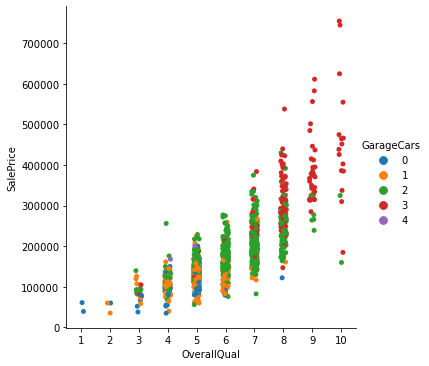

In [96]:
sns.catplot(data=df2_train,
    x="OverallQual", y="SalePrice",
    hue="GarageCars") 
##from the plot, higher quality houses tend to sale with higher price, furthermore, higher quality houses are tend to come with more cars garages.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

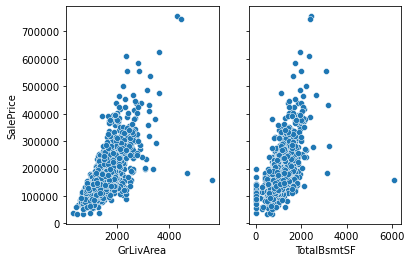

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(data=df2_train,x='GrLivArea',y="SalePrice", ax =ax1)
sns.scatterplot(data=df2_train,x='TotalBsmtSF',y="SalePrice", ax =ax2)
#from below graphs, there seems a linear relationship between general living area, basement area to sale price

<AxesSubplot:>

180921.19589041095

163000.0

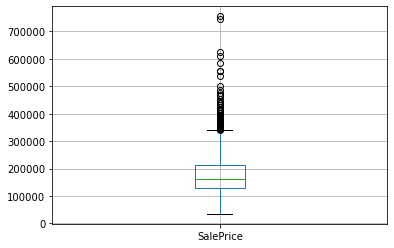

In [50]:
df2_train.boxplot(column=['SalePrice']) 
df2_train['SalePrice'].mean() #Sale price mean is 180921
df2_train['SalePrice'].median() #Sale price median number is 163000
#the ouliers in saleprice are big and more above 350k, the median house price is 163k 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

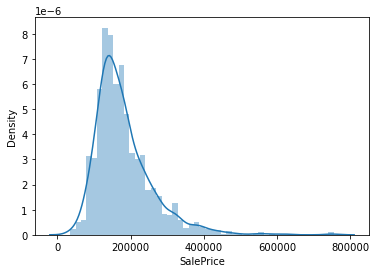

In [53]:
sns.distplot(df2_train['SalePrice'])

2. Categorical Variables

In [39]:
df2_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


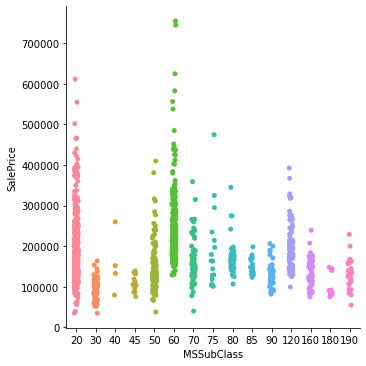

In [67]:
sns.catplot(data=df2_train,
    x="MSSubClass", y="SalePrice")   

In [65]:
df1_grouped = df2_train.groupby('MSSubClass').mean()[['SalePrice']]
df2_grouped = df2_train.groupby('MSSubClass').count()[['SalePrice']]
#df1_grouped
df_grouped = pd.merge(df1_grouped, df2_grouped, on=['MSSubClass'])
df_grouped ##from the below chart, the class 20 and 60 has bigger sales count. In another word, 1 story and 2 story home that are 1946 newers have more sale. 2 story newer home has the highest average sale price

,SalePrice_x,SalePrice_y
MSSubClass,,
20,185224.811567,536
30,95829.724638,69
40,156125.000000,4
45,108591.666667,12
50,143302.972222,144
60,239948.501672,299
70,166772.416667,60
75,192437.500000,16
80,169736.551724,58


In [85]:
#relationship between location and sale price
df1_neighbor = df2_train.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
df1_neighbor

Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'NAmes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'StoneBr'),
 Text(19, 0, 'ClearCr'),
 Text(20, 0, 'NPkVill'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

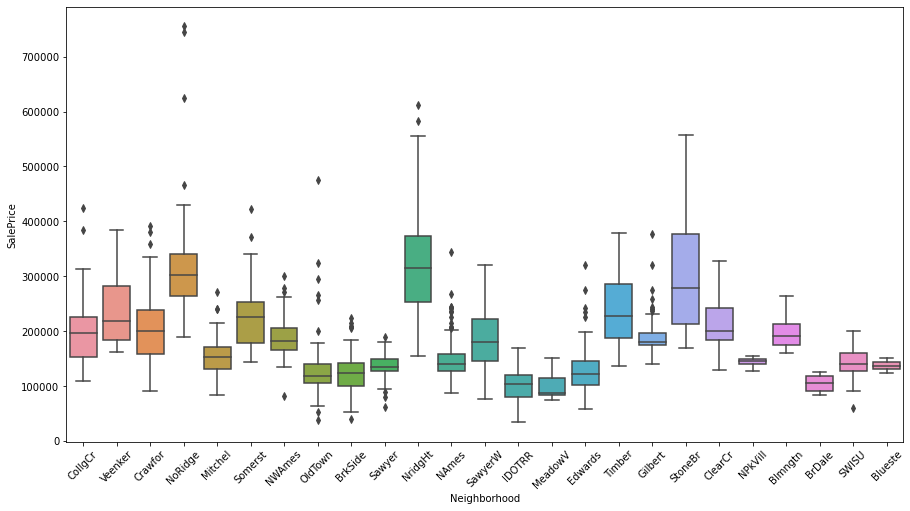

In [91]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df2_train,x='Neighborhood',y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Northridge heights has the highest median sale price, and half of the neighborhood, median sale price is under average sale price in the whole area. 

3. Basement Feature 

Basement has feature: BsmtFinSF1 (Type1 finished squarefeet), BsmtFinSF2 (Type2 finished squarefeet), BsmtUnfSF(unfinished basement squarefeet), TotalBsmtSF (total basement finish area). 

In [115]:
df_basement = df2_train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].copy()

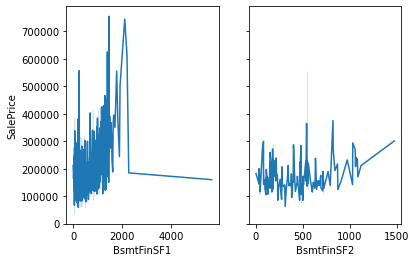

In [122]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
df1_bm = sns.lineplot(x='BsmtFinSF1',y='SalePrice', data = df2_train, ax = ax1)
df2_bm = sns.lineplot(x='BsmtFinSF2',y='SalePrice', data = df2_train, ax = ax2)


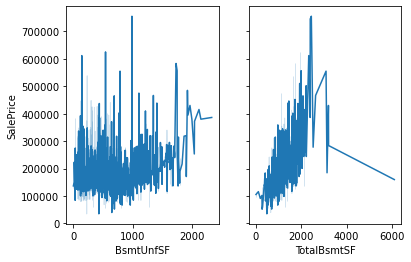

In [124]:
fig, (ax3, ax4) = plt.subplots(ncols=2, sharey=True)
df3_bm = sns.lineplot(x='BsmtUnfSF',y='SalePrice', data = df2_train, ax = ax3)
df4_bm = sns.lineplot(x='TotalBsmtSF',y='SalePrice', data = df2_train, ax = ax4)


In [137]:
df_basement['unfinish_ratio'] = (df_basement['BsmtUnfSF']/df_basement['TotalBsmtSF']).round(1)
df_basement.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice,unfinish_ratio
0,706,0,150,856,208500,0.2
1,978,0,284,1262,181500,0.2
2,486,0,434,920,223500,0.5
3,216,0,540,756,140000,0.7
4,655,0,490,1145,250000,0.4


In [140]:
df_basement.groupby(['unfinish_ratio'])['SalePrice'].count()

unfinish_ratio
0.0    100
0.1    115
0.2    172
0.3    167
0.4    109
0.5    131
0.6     60
0.7     54
0.8     36
0.9     11
1.0    468
Name: SalePrice, dtype: int64

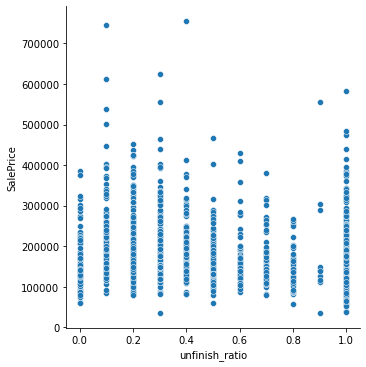

In [138]:
df5_bm = sns.relplot(x = 'unfinish_ratio', y='SalePrice', data = df_basement)

Using the unfinished area divde total basement area, came up with unfinished basement area ratio.
The relationship between sale price and unfinish ratio is not very clear, even though it seems
the lower ratio would sale with higher price, and unfinished basement has most sales 468 houses sold.

4. Scaling

In [146]:
#a. MinMaxScalar on numerical variable dataframe
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_nv_train)
columns = df_nv_train.columns
minmax_nv_train = pd.DataFrame(scaled,columns=[columns])
minmax_nv_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.140098,0.259231,...,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.00000,0.090909,0.50,0.241078
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.206547,0.174830,...,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.00000,0.363636,0.25,0.203583
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.150573,0.273549,...,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.00000,0.727273,0.50,0.261908
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.123732,0.260550,...,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.00000,0.090909,0.00,0.145952
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.187398,0.351168,...,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.00000,1.000000,0.50,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.155974,0.247362,...,0.5,0.375,0.333333,0.416667,0.333333,0.50,0.00000,0.636364,0.25,0.194556
1456,0.997944,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.252373,0.327619,...,0.0,0.375,0.333333,0.416667,0.666667,0.50,0.00000,0.090909,1.00,0.243161
1457,0.998629,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.188543,0.377920,...,0.0,0.500,0.333333,0.583333,0.666667,0.25,0.16129,0.363636,1.00,0.321622
1458,0.999315,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.176432,0.140166,...,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.00000,0.272727,1.00,0.148903


In [147]:
#b.encoding categorical variables and apply standardscaler on categorical variables
df_cat = df2_train.select_dtypes(include=['object']) #find all categorical variables
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [150]:
from sklearn.preprocessing import LabelEncoder  
labelencoder = LabelEncoder()
cols = df_cat.columns
df_cat_encode = df_cat[cols].apply(LabelEncoder().fit_transform)
df_cat_encode

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [151]:
#apply standard scaling on categorical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cat_encode)
columns = df_cat_encode.columns
std_cat_train = pd.DataFrame(scaled,columns=[columns])
std_cat_train

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,0.301599,-0.409369,0.255978,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.313867,0.208502
1,-0.045532,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,...,0.301599,0.795629,0.255978,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.313867,0.208502
2,-0.045532,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,0.301599,-0.409369,0.255978,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.313867,0.208502
3,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,...,0.301599,-0.409369,0.255978,1.301075,0.801942,0.11211,0.0689,0.289745,0.313867,-3.426284
4,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,...,0.301599,-0.409369,0.255978,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-0.707186,-0.036289,-0.03174,...,0.301599,0.795629,0.255978,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.313867,0.208502
1456,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,0.290872,-0.036289,-0.03174,...,0.301599,0.795629,-3.828474,-0.768736,0.801942,0.11211,0.0689,0.289745,0.313867,0.208502
1457,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.039872,-0.036289,-0.03174,...,0.301599,-0.409369,0.255978,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.313867,0.208502
1458,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-0.041814,-0.036289,-0.03174,...,-3.502585,-0.409369,0.255978,-0.768736,0.801942,0.11211,0.0689,0.289745,0.313867,0.208502
